In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df=pd.read_csv("Book1.csv")
df.head()

,Date,Price USD per Oz,Price INR per Gm
0,2009-01,857.726,2264.618110
1,2009-02,939.763,2481.216972
2,2009-03,925.989,2444.850056
3,2009-04,892.663,2356.860811
4,2009-05,926.855,2447.136519


In [64]:
df.drop(['Price USD per Oz'],axis=1,inplace=True)

In [65]:
df['Date']=pd.to_datetime(df['Date'])

In [66]:
df.set_index('Date',inplace=True)

In [67]:
df.head()

,Price INR per Gm
Date,
2009-01-01,2264.618110
2009-02-01,2481.216972
2009-03-01,2444.850056
2009-04-01,2356.860811
2009-05-01,2447.136519


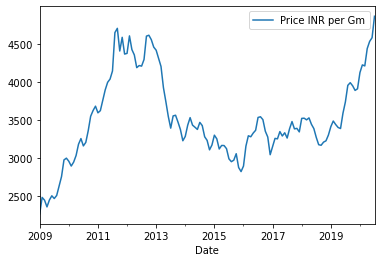

In [68]:
df.plot()

In [69]:
train=df.iloc[:100,0]
test=df.iloc[100:,0]
pred=[]

In [70]:
# dickyfuller test
from statsmodels.tsa.stattools import adfuller


In [71]:
def adfuller_test(price):
    result=adfuller(price)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for i,j in zip(result,labels):
        print(j+':'+str(i))
    if result[1]<=0.05:
        print('it is stationary ')
    else:
        print('it is not stationary .Make it stationary')

In [72]:
adfuller_test(df['Price INR per Gm'])

ADF Test Statistic:-1.5521362657931976
p-value:0.5075809297397111
#Lags Used:5
Number of Observations Used:133
it is not stationary .Make it stationary


In [73]:
df['first_difference']=df['Price INR per Gm']-df['Price INR per Gm'].shift(1)
df.head()

,Price INR per Gm,first_difference
Date,,
2009-01-01,2264.618110,NaN
2009-02-01,2481.216972,216.598862
2009-03-01,2444.850056,-36.366916
2009-04-01,2356.860811,-87.989245
2009-05-01,2447.136519,90.275708


In [74]:
adfuller_test(df['first_difference'].dropna())

ADF Test Statistic:-3.682772831796605
p-value:0.004362099347449027
#Lags Used:4
Number of Observations Used:133
it is stationary 


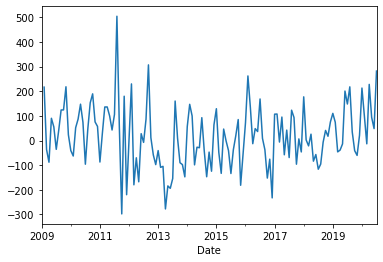

In [75]:
df['first_difference'].plot()

In [96]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Price INR per Gm'],order=(1,2,2))
model_fit=model.fit()
print(model_fit.aic)

1702.1677459423126


In [83]:
prediction=model_fit.forecast(steps=39)[0]
prediction

array([4944.52100058, 4980.25257952, 5004.03886905, 5024.88816261,
       5045.01533508, 5064.96495919, 5084.87092936, 5104.76616631,
       5124.65876428, 5144.55071339, 5164.44250298, 5184.33425334,
       5204.22599406, 5224.1177324 , 5244.00947017, 5263.90120778,
       5283.79294537, 5303.68468294, 5323.57642052, 5343.46815809,
       5363.35989566, 5383.25163323, 5403.14337081, 5423.03510838,
       5442.92684595, 5462.81858352, 5482.7103211 , 5502.60205867,
       5522.49379624, 5542.38553381, 5562.27727139, 5582.16900896,
       5602.06074653, 5621.9524841 , 5641.84422168, 5661.73595925,
       5681.62769682, 5701.51943439, 5721.41117197])

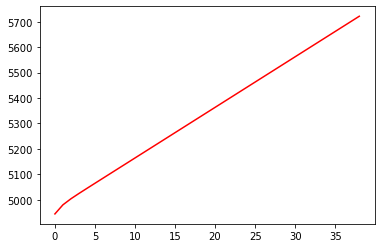

In [100]:
# plt.plot(test)
plt.plot(prediction,color='red')

In [92]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [95]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        mod=ARIMA(df['Price INR per Gm'],order=param)
        mod_fit=mod.fit()
        print(param,mod_fit.aic)
    except:
        continue

(0, 0, 0) 2158.86051929911
(0, 0, 1) 1989.044816337729
(0, 0, 2) 1916.0534147336662
(0, 0, 3) 1840.7786071215744
(0, 0, 4) 1814.8436880690303
(0, 1, 0) 1725.4177372357844
(0, 1, 1) 1718.1973378595842
(0, 1, 2) 1719.6991516241599
(0, 1, 3) 1719.8726983884292
(0, 1, 4) 1716.6946165002942
(0, 2, 0) 1767.553577246576
(0, 2, 1) 1714.9722463133303
(0, 2, 2) 1711.3077081274268
(0, 2, 3) 1711.4184902475258
(0, 2, 4) 1712.912756595059
(1, 0, 0) 1746.9889675700242
(1, 0, 1) 1738.5135589466388
(1, 0, 2) 1740.283484807839
(1, 0, 3) 1739.7852007810477
(1, 0, 4) 1737.042980015264
(1, 1, 0) 1719.2072231478198
(1, 1, 1) 1710.7481465258013
(1, 1, 2) 1711.2432832653667
(1, 2, 0) 1754.124029964199
(1, 2, 1) 1712.5246314337537
(1, 2, 2) 1702.1677459423126
(1, 2, 3) 1703.7639542655634
(2, 0, 0) 1739.2569914098046
(2, 0, 1) 1731.734206159545
(2, 1, 0) 1720.6055692148861
(2, 1, 1) 1710.9915425052084
(2, 1, 2) 1711.940390081052
(2, 2, 0) 1740.233911645139
(2, 2, 1) 1712.6459525070286
(2, 2, 2) 1703.7593634446